# Visualizing Climate Change on a Local Scale
#### Andrew Phillips, Brooke Aspen Mague Moss

## Research Question

#### What does Global Warming look like on a local level?

We've been hearing for years that the Earth is warming as a result of human-caused climate change. You may have even noticed changes to the weather around you, or have heard about record temperatures and natural disasters around the world. Putting anecdotal experiences aside, what does the data showing global warming look like?

We decided to dig into data collected by the ***National Oceanic and Atmospheric Administration (NOAA)***, more specifically their ***National Centers for Environmental Information (NCEI)***. By looking at these historical weather datasets from a wide variety of cities around the United States, we can begin to visualize the increase in global temperatures and ever-changing global climate.

We've noticed that the vast majority of global warming and climate change information in the media centers around either record-breaking disasters or complex scientific studies inaccessible to the average citizen. These studies tend to focus on data such as the size of polar ice caps, melting glaciers, ocean temperatures, and CO2 emissions. We decided to visualize weather data over time, not in the Arctic or the stratosphere, but from the same local weather stations that supply your weather app the current temperature when you wake up in the morning.

Our hypothesis is that if humans can see the data behind their anecdotal observations of a warming climate, and if these datasets are representative of their own backyards, they will be more inclined to understand the magnitude and urgency of the climate crisis.

As both authors of this project are Massachusetts natives, it was natural for us to begin the process with data for Boston. After exploring trends amongst the Boston data, we decided to expand into a variety of other American cities:
- Boston
- New York City
- Chicago
- Denver
- Bismarck, North Dakota
- Detroit
- Anchorage, Alaska
- Minneapolis

We think that this list of cities provides a suitable variety of geographic locations throughout the country. However, we did primarily focus on the northern half of the country, as we were interested in studying snowfall trends in addition to temperatures.

## Methodology

#### Functions

We start by importing our helper functions to call from the notebook:
- `compile_csvs()` will read our saved CSV files into a DataFrame for each city and collect these DataFrames into a dictionary.

- `plot_double_scatter()` takes a DataFrame of weather data for a city, along with 1 element to plot on the x axis and 1-2 elements to plot on the y axis. It can also plot lines of best fit.

- `plot_bar_decade()` plots a sum total of an element by decade. It takes the data, element to track, and date range.

- `plot_in_between()` plots best fit lines for 2 elements and fills the space between these lines.


In addition, there are some notable internal functions:
- `filter_month()` allows one particular month to be plotted over a range of years. It drops all datapoints that are not of the requested month, leaving only the necessary datapoints.

In [6]:
from helpers import compile_csvs, plot_double_scatter, plot_bar_decade, plot_in_between

#### Gathering Data

When originally gathering the data, we ran the `scrape_data.py` file, which called `get_dataframe()` and utilized **Requests** and **BeautifulSoup** to request the webpage for each city from WikiMedia Commons and read it into a DataFrame. We then used `clean_data()` to clean unnecessary rows, including where the datatables were missing values. It then saved each city's DataFrame into a CSV using `pd.to_csv()`. `clean_data()` also calls `convert_year()` to convert the dates column of the DataFrame into a fractional year values from the current string-based format to ensure that the data is properly spaced on each graph.

#### Compiling Data

Now, we can utilize `compile_csvs()` to read those CSV files into a dictionary of DataFrames. In this dictionary, the keys are stylized city names (i.e. New York City, Boston, etc) and the values are the DataFrame corresponding to that city.

In [7]:
df_dict = compile_csvs()

## Results

#### Types of Visualizations

For each of our visualization types, we started by testing and tweaking them using our Boston dataset.

First, we can plot Average High Temp and Average Low Temp for Boston for every month in the dataset, stretching back to 1891. In addition, we can plot trend lines for both of these values, showing an overall increase in both temperature indicators over the last 130 years.

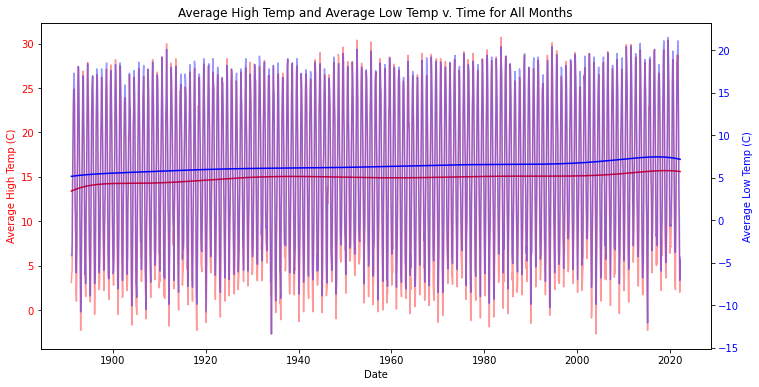

In [8]:
plot_double_scatter([df_dict['Boston'].copy(), 'date', 'avgHighTemp'], 'avgLowTemp', \
            fit='both', month_num=0, fit_degree=8)

After plotting all of this data, we notice that given the time period of our dataset, there is so much data that the graph becomes difficult to read. In addition, we feel that this visualization may not be the best way to represent year-over-year changes during colder or warmer parts of the year.

Armed with this knowledge, we began plotting year-over-year temperature averages for specific months. Shown below is a plot of Boston's average temperatures for the month of January only.

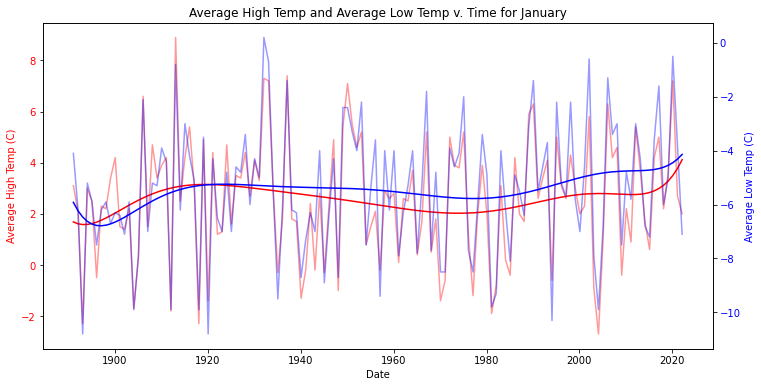

In [9]:
plot_double_scatter([df_dict['Boston'].copy(), 'date', 'avgHighTemp'], 'avgLowTemp', \
            fit='both', month_num=1, fit_degree=8)

In this graph, we start to see a meaningful trend, a visualization of Januarys over time. Again, we can see that both temperature indices are trending upward.

However, we are still curious what the overall trend looks like. To show this without overwhelming the plot with the individual data points, we can graph just the two trend lines on the same set of axes.

Graphing these on the same set of axes allows us to zero both at the same location, so we can compare not only the slope of the lines but also the values. 

To visualize the temperature variation (area between the two curves), we can fill in the space in between. We postulate that the size of this space correlates to weather unpredictability, for instance wild swings from warm to cold and back in the middle of the winter.

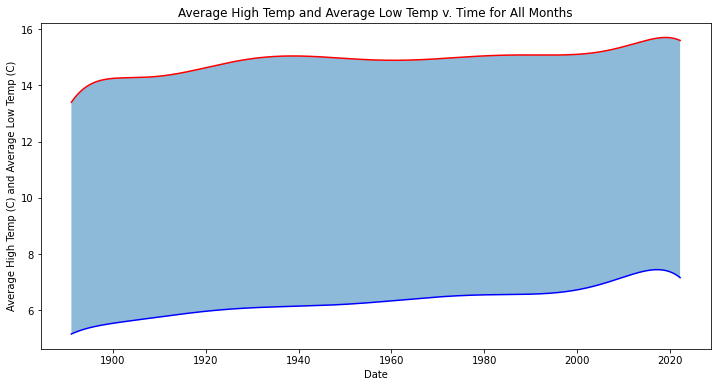

In [10]:
plot_in_between(df_dict['Boston'].copy(), 'date', ['avgHighTemp', 'avgLowTemp'], \
            month_num=0, fit_degree=8)

Next, we wanted to visualize the snowfall amounts over time, which we discovered seem to correlate relatively well with the average high temperatures. 

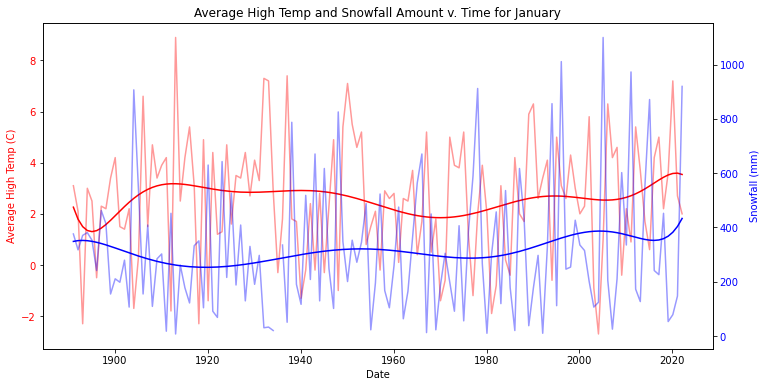

In [11]:
plot_double_scatter([df_dict['Boston'].copy(), 'date', 'avgHighTemp'], 'snowfall', \
            fit='both', month_num=1, fit_degree=9)

From this plot, we became intrigued by the ebb and flow of snowfall amounts over the years. To explore this further, we decided to plot a bar graph of cumulative snowfall amount for each decade over our dataset.

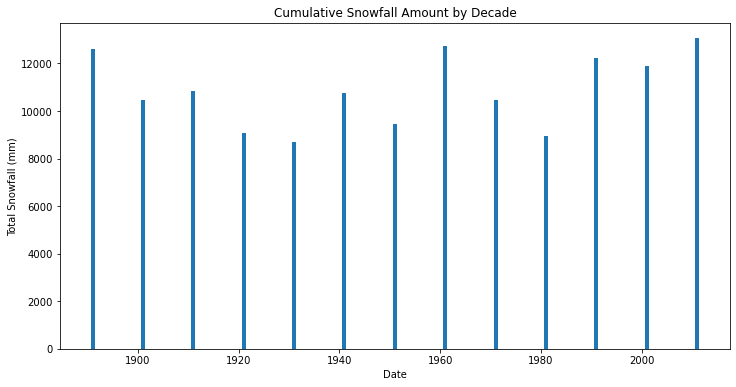

In [12]:
plot_bar_decade(df_dict['Boston'].copy(), [1891, 2021], 'snowfall')

This bar plot appears to be a good way to visualize the aforementioned fluctuations in snowfall amounts throughout the last 130 years.

As a note, the snowfall dataset for Boston is missing reported values for February 1932 and January 1935, which could potentially lead to a slight skewing of the above data.

#### Expanding our Horizons

##### Correlating High and Low Temperatures

One useful way to utilize our graphs is to plot the lines of best fit for average high and low temperatures over time (both by month and for all months).

Below, we have graphed this data for Chicago (all months) and Detroit (December).

For Chicago, we are particularly interested in the divergence between the two lines, which represents a greater overall temperature variance. We propose this variance signifies extreme weather and wild temperature swings, widely recognized as symptoms of climate change and global warming.

For Detroit, we notice the overall upward trajectory of both lines, which we believe corresponds to rising global temperatures. In particular, for a city in the Great Lakes region which is used to cold winters and lake-effect snow, an average December low temperature that is creeping up toward 0 C is concerning.

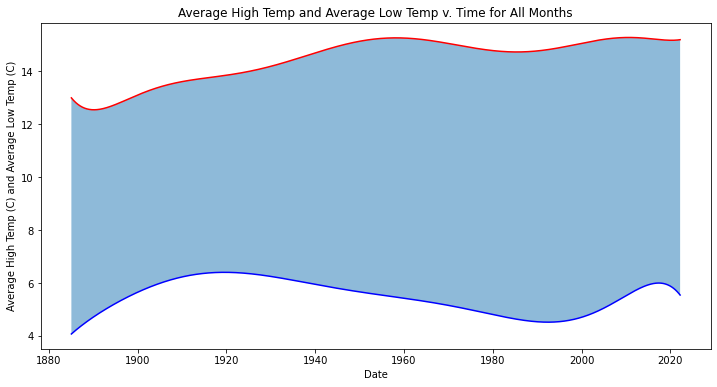

In [13]:
plot_in_between(df_dict['Chicago'].copy(), 'date', ['avgHighTemp', 'avgLowTemp'], \
            month_num=0, fit_degree=8)

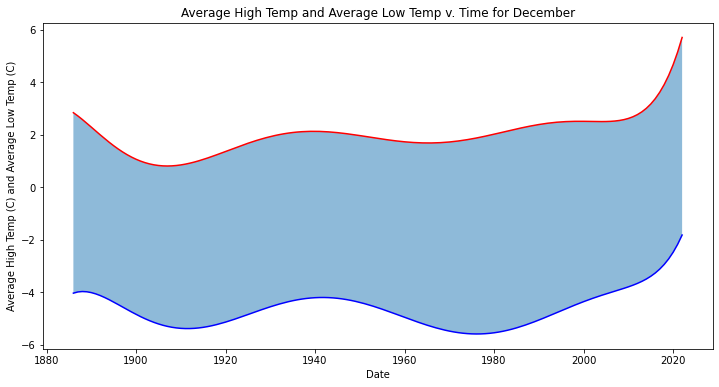

In [14]:
plot_in_between(df_dict['Detroit'].copy(), 'date', ['avgHighTemp', 'avgLowTemp'], \
            month_num=12, fit_degree=8)

Here, we plotted the trend in absolute high and low temperatures for Denver (June only). We can see a very distinct upward trend in the high temperatures, along with fluctuation and an overall increase in low temperatures.

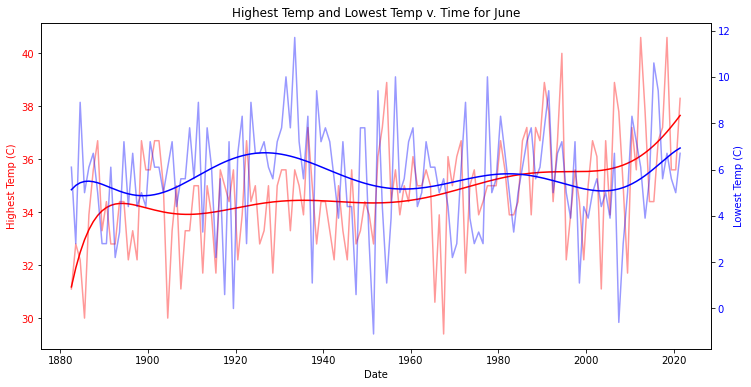

In [15]:
plot_double_scatter([df_dict['Denver'].copy(), 'date', 'highTemp'], 'lowTemp', \
            fit='both', month_num=6, fit_degree=8)

##### Exploring Snowfall

The next two plots visualize the average high temperature and snowfall amount for specific winter months in both Anchorage, Alaska and Bismarck, North Dakota. We were intrigued by the seemingly very solid inverse correlation between amount of snowfall and average high temps.

In Bismarck, we can see these lines almost exactly mirror each other. This effect is slightly less noticeable in Anchorage, however both also represent a slow upward creep in average high temps.

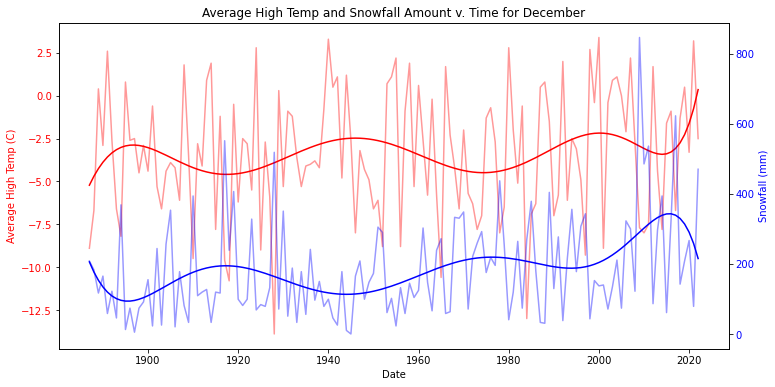

In [16]:
plot_double_scatter([df_dict['Bismarck, North Dakota'].copy(), 'date', 'avgHighTemp'], 'snowfall', \
            fit='both', month_num=12, fit_degree=8)

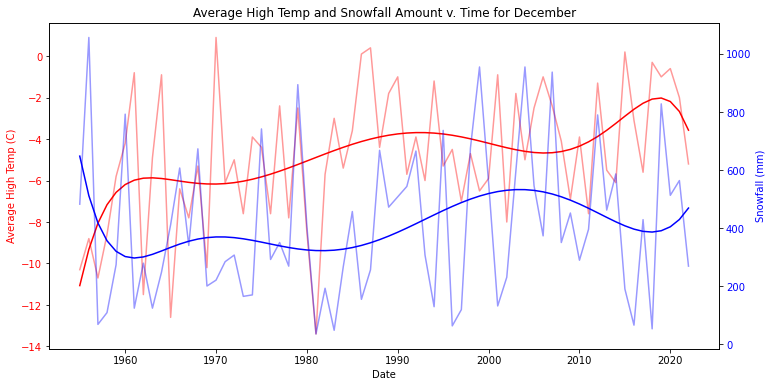

In [17]:
plot_double_scatter([df_dict['Anchorage, Alaska'].copy(), 'date', \
        'avgHighTemp'], 'snowfall', fit='both', month_num=12, fit_degree=8)

The below plot isn't particularly meaningful, however we found it interesting to discuss the correlation between snowfall days and snowfall amount, in this case for Minneapolis in February. Our hypothesis is that an increase in snowfall amount coupled with a decrease in snowfall days signifies fewer, larger storms. One might then extrapolate this thinking to the shape of this plot, analyzing the relative changes in the two lines.

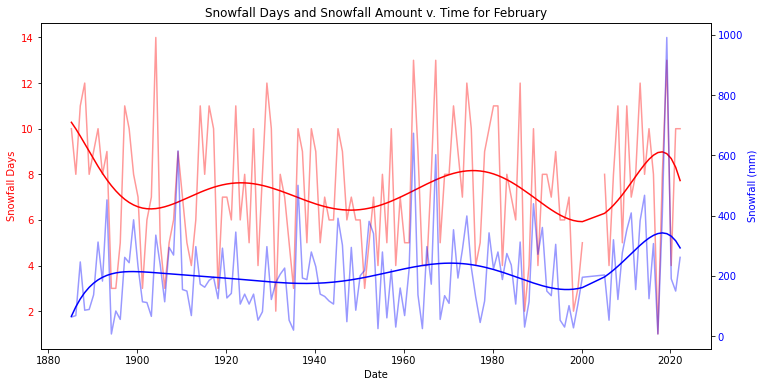

In [18]:
plot_double_scatter([df_dict['Minneapolis'].copy(), 'date', \
        'snowfallDays'], 'snowfall', fit='both', month_num=2, fit_degree=8)

##### Other Graphs

One of the other datapoints in our datasets that we have not used yet is precipitation. Below we have graphed New York City precipitation data from 1870-2019. Although we don't feel that there is anything impactful to glean from this graph, we still found it interesting to visualize.

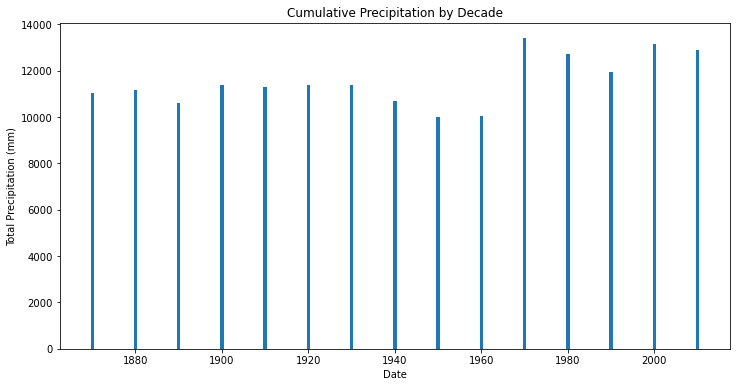

In [19]:
plot_bar_decade(df_dict['New York City'].copy(), [1870, 2020], 'precip')

## Interpretation

When exploring the findings of our project, we hope readers will gain insights into the creeping yet everpresent effects of climate change right at home. We hope readers will notice that climate change is not merely a future issue, despite the focus on the Paris Agreement's 1.5 degree threshold, but is actively occurring, meaningfully changing the global climate during our lifetimes.

Our findings include increases in average high and low temperatures in cities across the nation as well as increasingly volatile snowfall. We also noticed divergence in average temperatures, signifying the growing volatility of our weather overall. If our project is able to serve as a wake-up call and bring the subject of global warming into a local, understandable format for even one person, we would consider it a success.

Climate change is something that is currently and will in the future affect every resident of our planet, and we feel it is important for people to understand the context of the weather around them. In addition, given that our datasets are not exhaustive and world-encompassing, this project should not be taken as direct proof of global climate trends, but merely a gateway to exploring our changing climate through the lens of localized data.

We learned a few lessons throughout this project. For one, we learned that when in doubt while trying to handle a Pandas Series, use `pd.values.flatten()`. We developed our ability to split off individual tasks into their own functions, and learned how useful they can be. We also became more familiar with writing, storing, and reading data files and doing web scraping.

While working on this project, we were challenged and frustrated by a few different aspects. For one things, a number of the datasets that we gathered were missing either large swaths of snowfall data or individial datapoints here and there. This, combined with some cities only recording for a decade or two, meant that our pool of potential cities was quite limited. In addition, we found a difficult yet rewarding challenge in handling and visualizing our data, particularly getting familiar with Pandas' Series class and certain MatPlotLib functions.

If we had more time, we would be interested in expanding our visualizations to more cities around the world. We would also like to utilize different Python libraries to look at our data in new ways. In addition, it would be interesting to use global temperature trends over our time periods to control the city-specific data, to see to what degree each city might correlate with the global dataset.